# Prerequisites to run the notebook

A working jupyter lab environment is needed, to access files and run python cells. Libraries numpy, matplotlib, scipy and math are expected. Custom testcases are provided in the same directory.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from scipy.stats import norm
%matplotlib inline

## Reading the files to points

In [2]:
def fr(file):
    f = open(file, "r")

    ls = f.readlines()

    l = len(ls)

    ls = [ls[i].split(' ') for i in range(l)]

    #reading the values of x
    x = np.array([float(ls[i][0]) for i in range(l)])

    #reading the values of y
    y = np.array([float(ls[i][1]) for i in range(l)])

    f.close()
    
    return x, y

# Straight Line

Linear curve fitting technique is used to find the curve of best fit.

In [3]:
x, y = fr("dataset1.txt")

Inputting data for the first dataset.

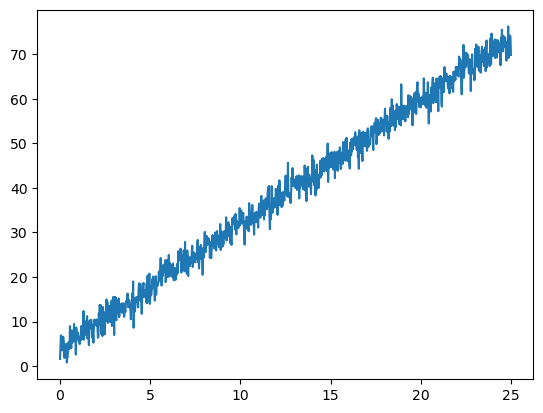

In [4]:
plt.plot(x, y)

Plotting the poitns on a graph.

In [5]:
def stline(t, m, c):
    return m*t + c

Defining the straight line equation.

The estimated equation is 2.7911242454149177 t + 3.848800101430744
115 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


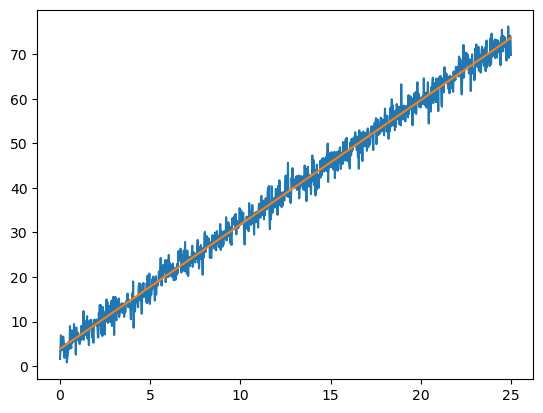

In [6]:
M = np.column_stack([x, np.ones(len(x))])

#using np.linalg.lstsq
(m, c), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
print(f"The estimated equation is {m} t + {c}")

yls = np.array([m*x[i] + c for i in range(len(x))])

#plotting datapoints and the graph
plt.plot(x, y, x, yls)
%timeit np.linalg.lstsq(M, y, rcond=None)

## Explanation

Using `lstsq` function to estimate the straight line. The time taken to perform this operation is also observed.

The estimated equation is 2.7911242448201588 t + 3.848800111263445
1.03 ms ± 78.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


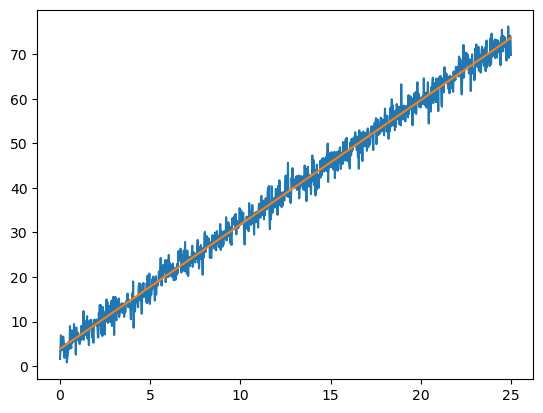

In [7]:
#using curve_fit to estimate the straight line
(m1, c1), _ = curve_fit(stline, x, y)

print(f"The estimated equation is {m1} t + {c1}")

ycf = np.array([stline(x[i], m1, c1) for i in range(len(x))])

#plotting the data points and the estimated line
plt.plot(x, y, x, ycf)

%timeit curve_fit(stline, x, y)

## Explanation

Using `curve_fit` function to estimate the values of slope and intercept in the `stline` fucntion. This estimates a linear curve for the given set of datapoints. The time taken is also observed.

In [8]:
sq_err1 = np.sum((yls - y)**2)

sq_err2 = np.sum((ycf - y)**2)

print(f"The error using 'lstsq' function is {sq_err1}.")
print(f"The error using 'curve_fit' function is {sq_err2}.")

The error using 'lstsq' function is 3983.4123805732743.
The error using 'curve_fit' function is 3983.412380573275.


## Explanation

Calculating the mean squared error to check which methos performs better. 

It is observed that both of the methods perform equally good in terms of accuracy. But the time taken by `curve_fit` function is more than that of `lstq` function. We can infer that `lstq` function computes the linear curve faster, this might be due to the internal computing of this function. The drwback for this function is it can fit only straight lines for any dataset, unlike the `curve_fit` fucntion.

The standard deviation of difference error is 1.2033609322616174


<ErrorbarContainer object of 3 artists>

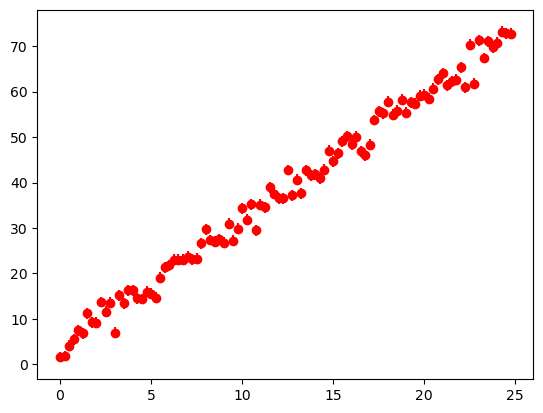

In [9]:
print("The standard deviation of difference error is", np.std(abs(yls - y)))

plt.errorbar(x[::10], y[::10], np.std(abs(yls - y)), fmt='ro')

## Explanation

Plotting the rough error plot for the given function. We assume the error bar lenght to be estimated to the standard deviation of the difference between estimated value and the true value.

# Fourier Series

Non-linear curve fitting technique is used to find the curve of best fit.

In [10]:
x, y = fr("dataset2.txt")

Reading the data points.

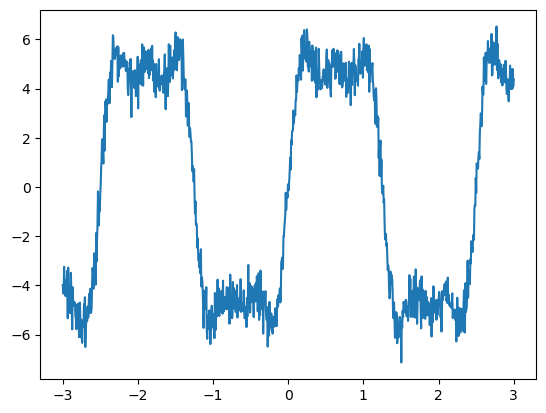

In [11]:
plt.plot(x, y)

PLotting the data points.

## Approach

We observe the graph, which looks like a square wave with 3 dominant frequencies. We device functions with 2 to 4 dominant frequencies and try to fit an appropriate fourier series with estimated amplitudes using the `curve_fit` function.

$$f(x) = \frac{4}{\pi} \times \sum_{n=1,3,5}\frac{A_i}{n} \times \sin(\frac{n \pi x}{L})$$

In [12]:
def sinfunc2(t, L, A1, A2):
    return (4/np.pi) * (A1*(1/1) * np.sin(1*np.pi*t/L) + A2*(1/3) * np.sin(3*np.pi*t/L))

The fourier series with 2 dominant frequencies.

The values L = 1.2474440435363578, A1 = 4.676998511568551 and A2 = 4.838435864140916.


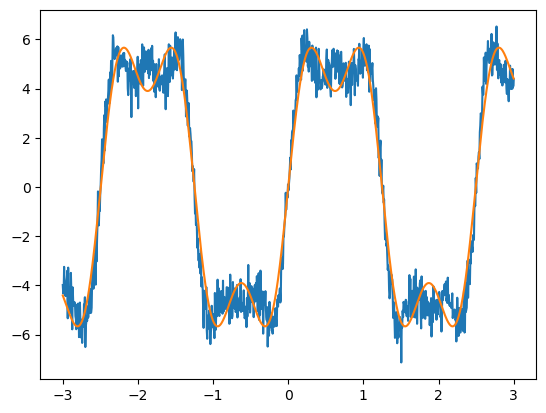

In [13]:
#using curve_fit function to regress for T and h
(L, A1, A2), _ = curve_fit(sinfunc2, x[:], y[:])

print(f"The values L = {L}, A1 = {A1} and A2 = {A2}.")

yest = sinfunc2(x, L, A1, A2)
#plotting data points and the estimated curve
plt.plot(x, y, x, yest)

In [14]:
def sinfunc3(t, L, A1, A2, A3):
    return (4/np.pi) * (A1*(1/1) * np.sin(1*np.pi*t/L) + A2*(1/3) * np.sin(3*np.pi*t/L) + A3*(1/5) * np.sin(5*np.pi*t/L))

The fourier series with 3 dominant frequencies.

The values L = 1.2502683966715826, A1 = 4.721122662738072, A2 = 4.71582492719321 and A3 = 3.852015992501114.


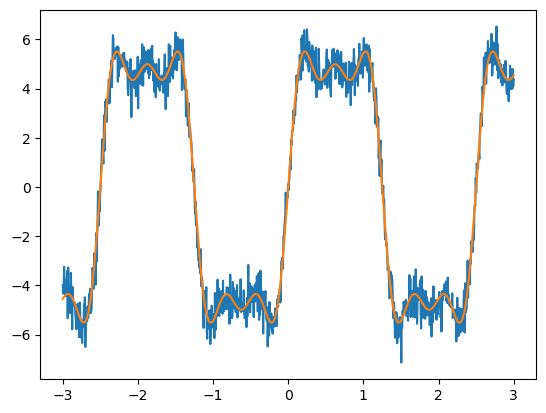

In [15]:
#using curve_fit function to regress for coefficients of each term and fundamental frequency
(L, A1, A2, A3), _ = curve_fit(sinfunc3, x[:], y[:])

print(f"The values L = {L}, A1 = {A1}, A2 = {A2} and A3 = {A3}.")

yest = sinfunc3(x, L, A1, A2, A3)
#plotting data points and the estimated curve
plt.plot(x, y, x, yest)

In [16]:
def sinfunc4(t, L, A1, A2, A3, A4):
    return (4/np.pi) * (A1*(1/1) * np.sin(1*np.pi*t/L) + A2*(1/3) * np.sin(3*np.pi*t/L) + A3*(1/5) * np.sin(5*np.pi*t/L) + + A4*(1/7) * np.sin(7*np.pi*t/L))

The fourier series with 4 dominant frequencies.

The values L = 1.250272687101689, A1 = 4.721008791186987, A2 = 4.716158083865103, A3 = 3.851511892151038 and A4 = 0.02115238383231096.


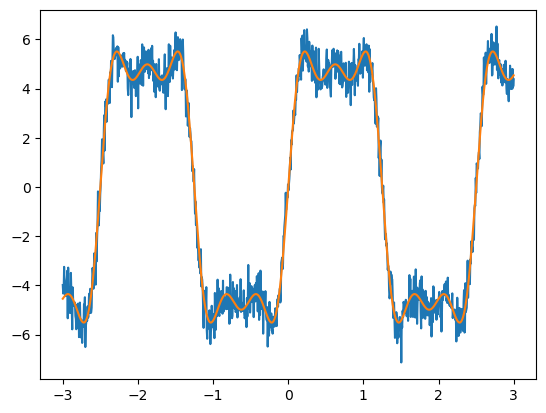

In [17]:
#using curve_fit function to regress for T and h
(L, A1, A2, A3, A4), _ = curve_fit(sinfunc4, x[:], y[:])

print(f"The values L = {L}, A1 = {A1}, A2 = {A2}, A3 = {A3} and A4 = {A4}.")

yest = sinfunc4(x, L, A1, A2, A3, A4)
#plotting data points and the estimated curve
plt.plot(x, y, x, yest)

## Explanation

We observe that the first 3 odd harmonics are the most dominant in the Fourier series expansion of the following distribution. The function is estimated accordingly using the `curve_fit` function to regress for the fundamental frequency and amplitudes of each term in the sequence. The amplitudes of higher order frequencies die out. As seen in the case of A4.

Here we use non-linear regression in contrast to the first dataset.

<ErrorbarContainer object of 3 artists>

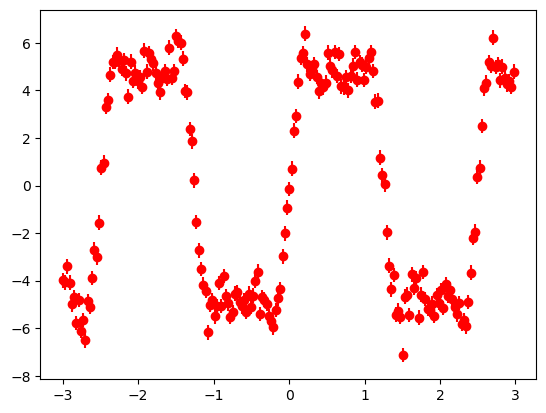

In [18]:
err = np.std(abs(yest - y))
#plotting the errorbar
plt.errorbar(x[::5], y[::5], err, fmt='ro')

## Explanation

Plotting the rough error plot for the given function. We assume the error bar lenght to be estimated to the standard deviation of the difference between estimated value and the true value.

# Planck's Constant

Non-linear curve fitting technique is used to find the curve of best fit.

In [19]:
x, y = fr("dataset3.txt")

Reading the data points.

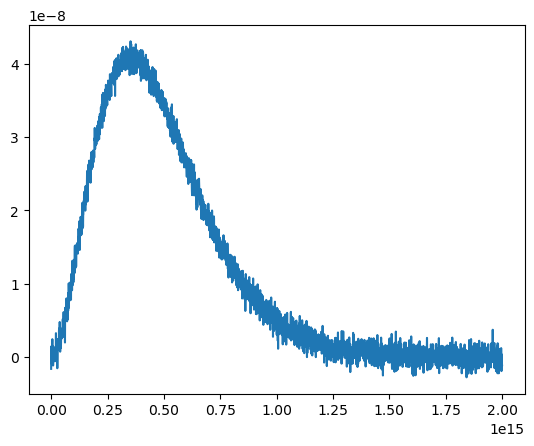

In [20]:
plt.plot(x, y)

Plotting the data points

## Formula

$$B_f(T) = \frac{2f^2}{c^2} \frac{hf}{e^{\frac{hf}{kT}} - 1}$$

The values T = 6011.361513838702 and h = 6.6432297464981865e-34.


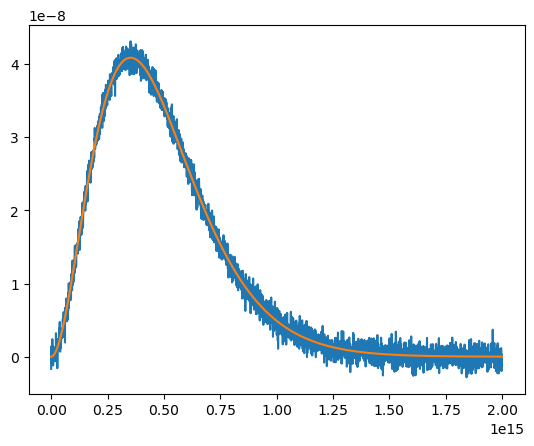

In [21]:
c= 3.0e8
k = 1.38e-23

#balck body radiation equation
def bbfunc(f, T, h):
    return ((2*h*f*f*f)/(c*c))* (1.0/(np.exp((h/k)*(f/T)) - 1.0))

#using curve_fit function to regress for T and h.
(T, h), _ = curve_fit(bbfunc, x, y, p0=[300, 1e-34])

print(f"The values T = {T} and h = {h}.")

yest = bbfunc(x, T, h)
#plotting the data points and the estimated curve
plt.plot(x, y, x, yest)

## Explanation

The spectral radiance equation is defined in `bbfunc` and is used for regression using the `curve_fit` function for regressing against the values of `T` and `h`.

We observe $T = 6011.361513838702 K$ and $h = 6.6432297464981865 \times 10^{-34} J.s$

<ErrorbarContainer object of 3 artists>

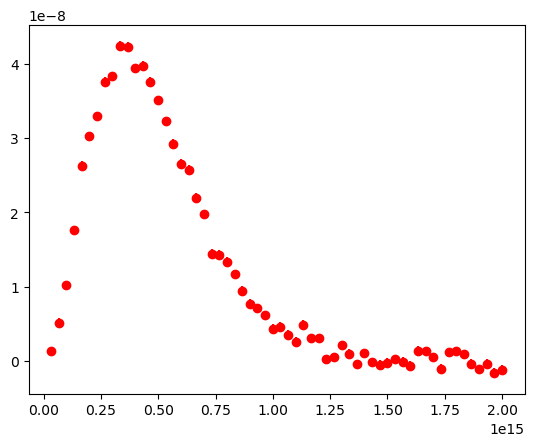

In [22]:
err = np.std(abs(yest - y))
#plotting the error bar
plt.errorbar(x[::50], y[::50], err, fmt='ro')

## Explanation

Plotting the rough error plot for the given function. We assume the error bar lenght to be estimated to the standard deviation of the difference between estimated value and the true value.

# Dataset 4

Different points are plotted for each value, this is a discrete curve fit.

In [23]:
x, y = fr("dataset4.txt")

Reading the data points.

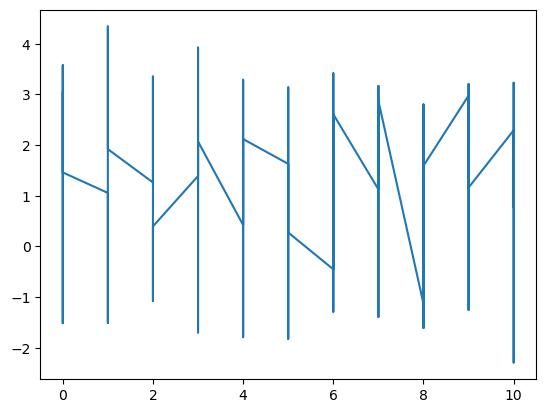

In [24]:
plt.plot(x, y)

Plotting the datapoints in continuous space.

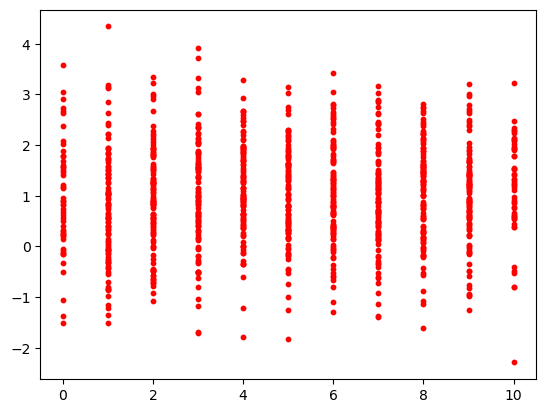

In [25]:
plt.scatter(x, y, c = 'r', s=10)

Discrete plotting or scatter plotting the given function.

## Approach

The given dataset has x values as integers and we observe that each integer has multiple values of y. This is not a function, as it is one-many in nature. We try to analyze each set of integer value of x and observe the corresponding values of y.

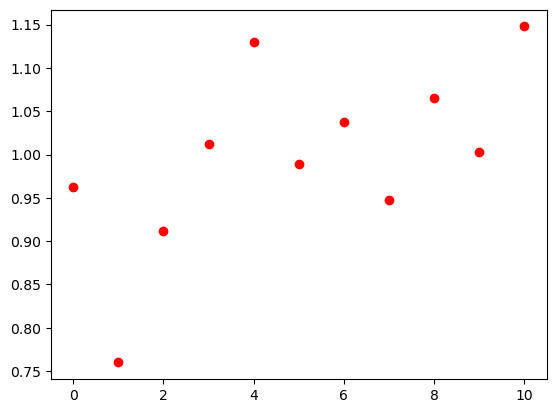

In [26]:
same = [[] for i in range(11)]

#seperating values of y for different integer values of x
for i in range(len(x)):
    for j in range(11):
        if int(x[i]) == j:
            same[j].append(y[i])

#calculating mean of each distribution
mean = [np.mean(same[i]) for i in range(11)]

#calculating standard deviation of each distribution
std = [np.std(same[i]) for i in range(11)]

xest = [i for i in range(11)]

#plotting the mean of each distribution
plt.scatter(xest, mean, c ='r')

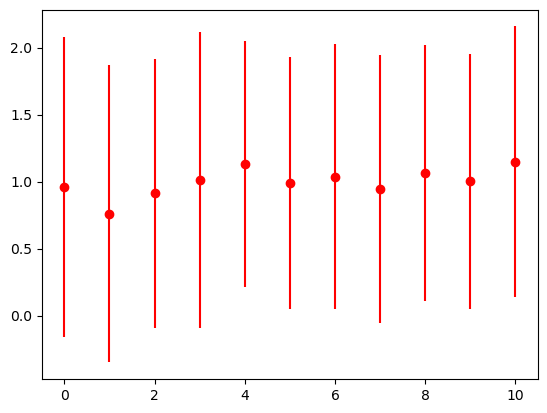

In [27]:
#plotting the error bar using standard deviation as error
for i in range(11):
    plt.errorbar(i, mean[i], std[i], fmt='ro')

## Explanation

Seperating out all the values of y for each integer value of x and writing into `same`. We then try to find mean of each set of values corresponding to that integer along with its standard deviation, which is then plotted as an error bar. The mean serves as an approximation of the distribution and the standard deviation is used as an approximate value for the error in for that integer's distribution.

In [28]:
def erfunc(x, a, m, s):
    return a * (norm.cdf(x-m)/s)

This is the Cumulative Distribution Function of a Gaussian or Normal Distribution.

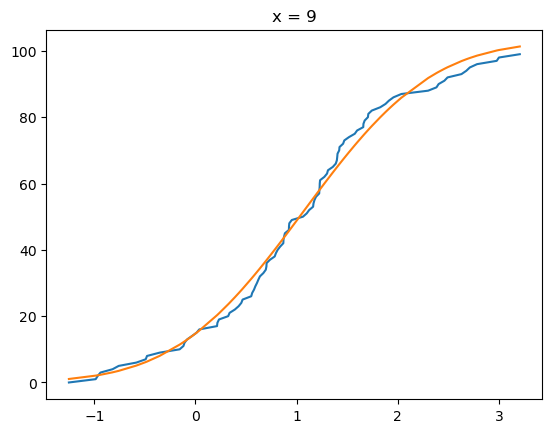

In [29]:
#the integer value of x under observation
q = 9

xf = np.array([i for i in range(len(same[q]))])

#sorting the list of values of y for corresponding to that integer value of x
same[q].sort()

#using curve_fit function to regress for amplitude, mean and standard deviation
(a, m, s), _ = curve_fit(erfunc, same[q], xf)

yf = np.array([erfunc(same[q][i], a, m, s) for i in range(len(same[q]))])

#plotting the data points of that x and the curve that is estimated
plt.title(f"x = {q}")
plt.plot(same[q], xf, same[q], yf)

## Explanation

We observe that the for each integral value of x, the value of y follows an $erf$ function, which implies the data in each set is a gaussian normal distribution aroung the mean with a specific standard deviation. The mean and standard deviation for each of these distributions are calculated using `curve_fit` for the `erfunc` function. Changing the value of q from 0 to 10, will give the distibution at each integer value of x.

This imples y values are gaussian distribution over a mean with a standard deviation for its corresponding value of x. The bell-curve fit is a good curve for this dataset for each integer value of x.